<a href="https://colab.research.google.com/github/DanB1421/DanB1421/blob/main/assignment_05/assignment_05_part_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 05: Part 3- How to Use Jupyter Notebooks

- Name: Daniel Brilliant
- Date: 03/02/2022

## What is a Jupyter Notebook?

Like a text document, but you can run and execute code on it. Can also display graphs, pull data from databases, or show spreadsheets live

## Part 1: Everything is a cell

Jupyter notebooks  are organized as a set of "cells". Each cell can contain different types of content (markdown text, Python code, R code, etc.) This cell containing text is a markdown cell, cells with code are code cells, as displayed below.

In [22]:
2*6

12

Double clicking on cells allows for editing. Notebooks can be exported into PDF reports when analysis is finished. Every code cell has an execution number with a preserved order of organization in the order which each code cell is executed (listed as a number in brackets before the code in the code cell)

Keyboard shortcuts:
- Command/Control + m + a - add cell above selected cell
- Command/Control + m + d - delete selected cell
- Command/control + m + b - add cell below selected cell
- Command/control + m + y - switches cell from text to python
- Command + m double tap - switches cell to markdown
- Up and down arrow keys - in command mode, move up and down between cells
- Command/control + return - runs code in currently selected cell
- Shift + return - runs code in currently selected cell and moves to select the following cell
- Command/control + m + z - undo action

Switch from editing to command mode- Esc key

Editing mode allows for cells to be edited, command mode allows for movement/addition of cells

## Part 2: Working with code

Notebooks can create easily readable documents, but are most beneficial to creating code. Some Python experimentation can be seen below.

In [24]:
import numpy as np
import matplotlib.pyplot as plt

In [25]:
x = np.linspace(0, 10, 500)
y = np.cumsum(np.random.randn(500,6), 0)

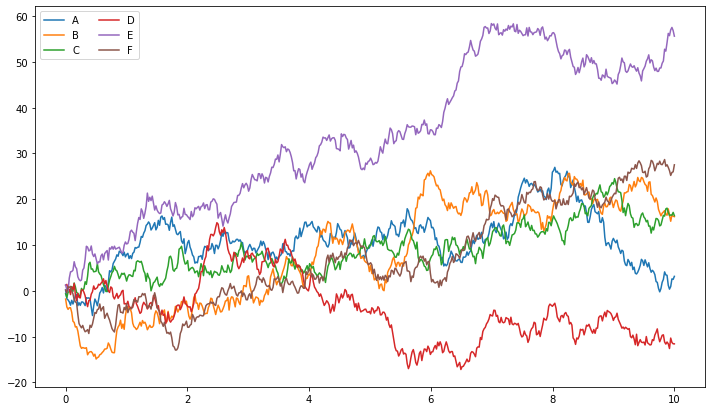

In [26]:
plt.figure(figsize=(12, 7))
plt.plot(x,y)
plt.legend('ABCDEF', ncol=2, loc='upper left')

This is just a plot of randomly generated datapoints, but notebooks make numeric processing and plotting easy.

## Part 3: Interacting with data

Notebooks make it simple to interact with files in local storage. Files are stored in the cloud and can be accessed anywhere. To show an example, cryptocurrencies prices can be pulled from a public API and downloaded as excel files. Two libraries must be imported to perform this task.

In [27]:
import requests
import pandas as pd

The following function pulls data from Cryptowatch

In [28]:
def get_historic_price(symbol, exchange='bitfinex', after='2018-09-01'):
    url = 'https://api.cryptowat.ch/markets/{exchange}/{symbol}usd/ohlc'.format(
        symbol=symbol, exchange=exchange)
    resp = requests.get(url, params={
        'periods': '3600',
        'after': str(int(pd.Timestamp(after).timestamp()))
    })
    resp.raise_for_status()
    data = resp.json()
    df = pd.DataFrame(data['result']['3600'], columns=[
        'CloseTime', 'OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice', 'Volume', 'NA'
    ])
    df['CloseTime'] = pd.to_datetime(df['CloseTime'], unit='s')
    df.set_index('CloseTime', inplace=True)
    return df

More data can be pulled from Bitcoin and Ether, two popular cryptocurrencies

In [29]:
last_week = (pd.Timestamp.now() - pd.offsets.Day(7))
last_week

Timestamp('2022-02-23 19:25:01.066905')

In [30]:
btc = get_historic_price('btc', 'bitstamp', after=last_week)

In [31]:
eth = get_historic_price('eth', 'bitstamp', after=last_week)

**Bitcoin**:

In [36]:
btc.describe()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
count,169.000000,169.000000,169.000000,169.000000,169.000000,1.690000e+02
mean,39830.942012,40131.497278,39573.501006,39867.802367,114.489340,4.503432e+06
std,2733.784952,2743.949383,2751.653507,2745.212879,144.750126,5.400680e+06
min,34664.390000,35090.390000,34324.050000,34654.290000,4.595978,1.785289e+05
25%,38258.030000,38549.870000,38021.830000,38271.130000,37.797841,1.524377e+06
50%,39100.840000,39293.920000,38830.900000,39118.520000,65.939466,2.584958e+06
75%,43171.860000,43416.850000,42892.370000,43178.980000,151.821100,5.915482e+06
max,44858.140000,45332.380000,44454.990000,44822.340000,1276.449790,4.450548e+07


In [32]:
btc.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2022-02-23 20:00:00,37787.37,37897.60,37538.84,37636.45,156.873253,5.915482e+06
2022-02-23 21:00:00,37631.18,37740.01,37401.00,37688.34,80.419854,3.022834e+06
2022-02-23 22:00:00,37690.87,37821.15,37437.02,37572.52,29.268674,1.100953e+06
2022-02-23 23:00:00,37528.57,37680.35,37149.20,37680.35,67.513992,2.525688e+06
2022-02-24 00:00:00,37663.20,37732.87,37060.16,37274.18,65.939466,2.460365e+06


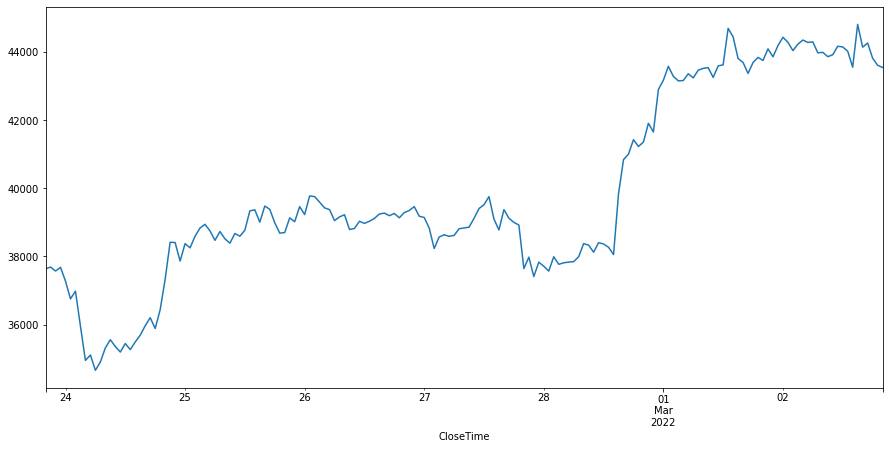

In [33]:
btc['ClosePrice'].plot(figsize=(15, 7))

**Ether:**

In [34]:
eth.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2022-02-23 20:00:00,2651.75,2665.42,2620.00,2638.26,418.731857,1.106460e+06
2022-02-23 21:00:00,2632.90,2642.29,2609.48,2622.83,751.360401,1.972566e+06
2022-02-23 22:00:00,2623.73,2636.36,2610.00,2619.19,196.801520,5.169906e+05
2022-02-23 23:00:00,2618.86,2639.90,2596.10,2636.01,276.007789,7.212567e+05
2022-02-24 00:00:00,2639.41,2639.41,2577.06,2579.62,274.949038,7.141885e+05


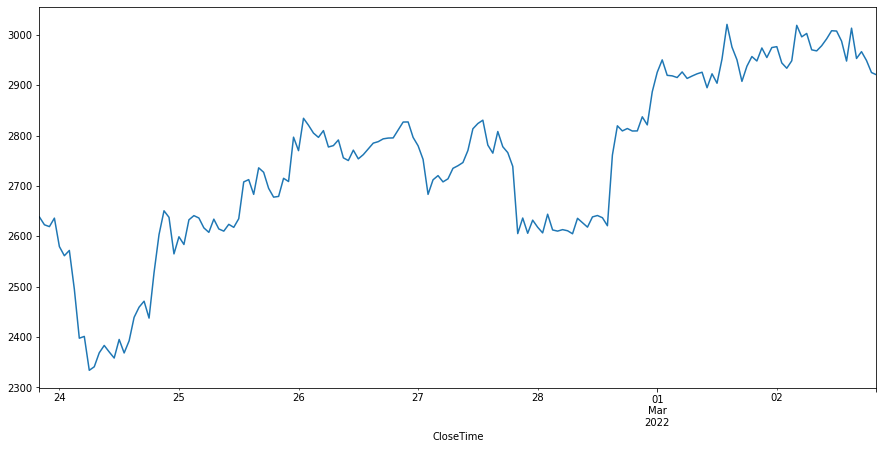

In [35]:
eth['ClosePrice'].plot(figsize=(15, 7))

Data can easily be pulled from the internet, put into a data frame, and plotted with a Jupyter notebook.

## Bonus: Dynamic plots with Bokeh

Bokeh has interactive plots that can be manipulated within the browser.

In [37]:
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook

In [38]:
output_notebook()

And the plot can be generated as follows:

In [39]:
p1 = figure(x_axis_type="datetime", title="Crypto Prices", width=800)
p1.grid.grid_line_alpha=0.3
p1.xaxis.axis_label = 'Date'
p1.yaxis.axis_label = 'Price'

p1.line(btc.index, btc['ClosePrice'], color='#f2a900', legend='Bitcoin')
#p1.line(eth.index, eth['ClosePrice'], color='#A6CEE3', legend='Ether')

p1.legend.location = "top_left"

show(p1)

The above plot is interactive. You can zoom in and out and scroll within it.

## Part 4: Exporting to Excel

We can now generate an Excel file from the downloaded prices. Working with Excel is easy in Jupyter notebooks. You can create an "Excel writer" from pandas

In [40]:
writer = pd.ExcelWriter('cryptos.xlsx')

You can also write the Bitcoin and Ether data as separate sheets

In [41]:
btc.to_excel(writer, sheet_name='Bitcoin')

In [42]:
eth.to_excel(writer, sheet_name='Ether')

Once this is done, you can save the file

In [43]:
writer.save()

The file should then be visible in the left side navigation bar, as seen in the screenshot below 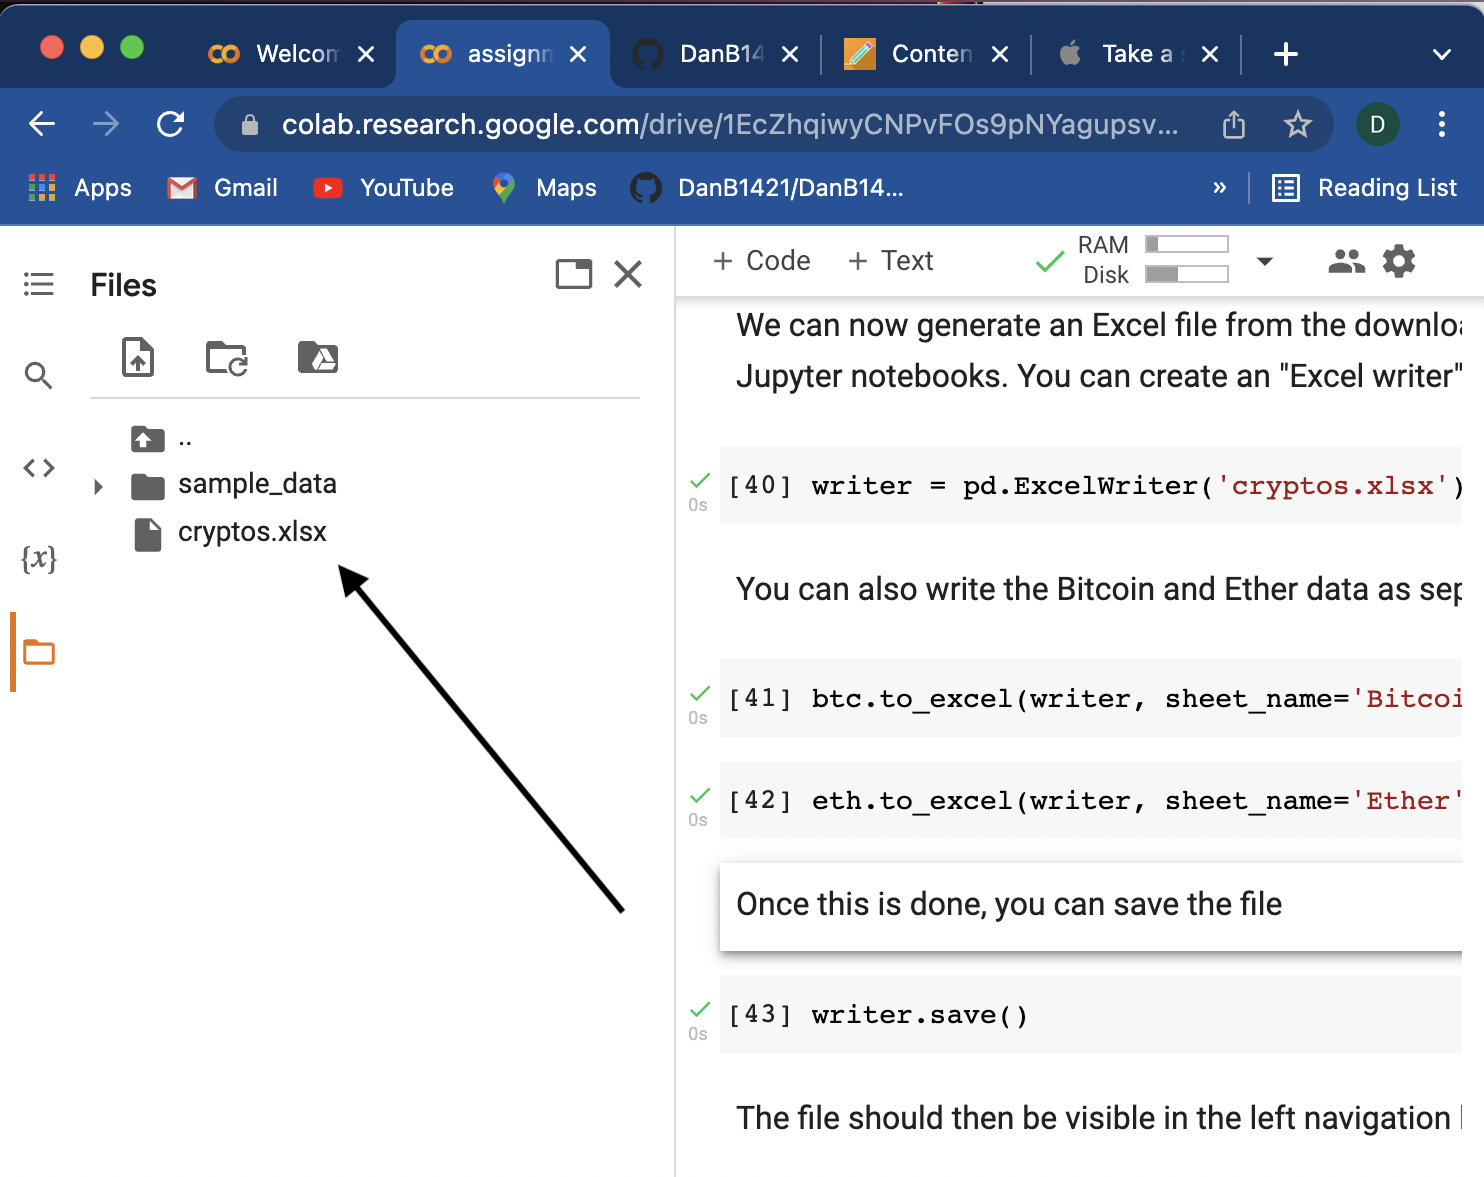